# KNN from scratch

In [ ]:
import math
import random
import pandas as pd

   ### Dataset


In [ ]:
dataset = pd.read_csv("gene_expression.csv")
dataset.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
# Get unique classes
classes = list(set(dataset['Cancer Present']))
print('classes:',classes)
number_of_class = len(classes)
print('\nnumber_of_records:',len(dataset))

classes: [0, 1]

number_of_records: 3000


### Dataset d'entrainement et de test


In [ ]:
# Getting random indexes
indexes = random.sample(range(0, 3000), 3000)

train = []
test = []

# Splting into training and testing
for i in range(2400):
    train.append(dataset.iloc[indexes[i]])

for i in range(2400,3000):
    test.append(dataset.iloc[indexes[i]])
# Normalizing data
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(train)
train= scaler.transform(train)
test= scaler.transform(test)

### La fonction de la distance euclidiènne KNN
 Cette fonction implémente l'algorithme KNN pour classifier un exemple de test en se basant sur les k exemples les plus proches dans l'ensemble de données d'entraînement.

In [ ]:
def knn(training_dataset, test, k):

    # Euclidean Distance

    # ED = list(np.sqrt(np.sum(np.square(training_dataset[:,0:-1] - test[0:-1]), axis = 1)))
    ED = []
    for i in range(len(training_dataset)):

        add = 0.0
        for j in range(3):
            add +=((training_dataset[i][j]-test[j])**2 )

        ED.append(math.sqrt(add))

    sorted_ED = sorted(ED)

    KNN = []
    for i in range(k):
        index = ED.index(sorted_ED[i])
        KNN.append(training_dataset[index][-1])
    return KNN

### L'appel de la fonction KNN

In [ ]:

k = 5

# Creating new Datafra
result = pd.DataFrame(columns=['Gene_one','Gene_two','predicted_class','actual_class','neighbours(K)','cancer','no_cancer'])

for i in range(len(test)):
    KNN = knn(train, test[i], k)

    cancer=0
    no_cancer=0
    for element in KNN:
        if element ==0:
            no_cancer +=1
        if element ==1:
            cancer +=1

    unique_counts = [no_cancer,cancer]
    unique_values = ['no_cancer','cancer']
    result.loc[i] = [test[i][0],test[i][1], unique_values[int(unique_counts.index(max(unique_counts)))],
                     unique_values[int(test[i][2])],k,no_cancer,cancer]



In [ ]:
result

,Gene_one,Gene_two,predicted_class,actual_class,neighbours(K),cancer,no_cancer
0,0.324685,0.945822,no_cancer,no_cancer,5,5,0
1,0.619286,0.785166,no_cancer,no_cancer,5,5,0
2,0.637147,0.770742,no_cancer,no_cancer,5,5,0
3,0.381488,0.924374,no_cancer,no_cancer,5,5,0
4,0.384615,0.923077,no_cancer,no_cancer,5,5,0
...,...,...,...,...,...,...,...
595,0.806004,0.591910,no_cancer,no_cancer,5,5,0
596,0.494839,0.868985,no_cancer,no_cancer,5,5,0
597,0.557434,0.830221,no_cancer,no_cancer,5,5,0
598,0.538662,0.842522,no_cancer,no_cancer,5,5,0


## Evaluation du modèle
### Accuracy


In [ ]:
accuracy_data = result['actual_class']==result['predicted_class']

true = 0
false = 0
for bool_value in accuracy_data:
    if(bool_value == True):
        true+=1
    else:
        false+=1

In [ ]:
accuracy = true/len(accuracy_data)

In [ ]:
accuracy

1.0

# KNN from sklearn

In [ ]:
X = dataset[['Gene One', 'Gene Two']].values
y = dataset['Cancer Present'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
len(X_train)

2400

In [ ]:
# Normalizing data
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train)
normalized_x_train= scaler.transform(X_train)
normalized_x_test= scaler.transform(X_test)

In [ ]:
#standerizing data
from sklearn.preprocessing import StandardScaler
standScaler=StandardScaler()

In [ ]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 5)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(normalized_x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(normalized_x_test)

In [ ]:
#Evaluating predictions
cm = confusion_matrix(y_test, y_pred)
cm

array([[253,  45],
       [ 49, 253]], dtype=int64)

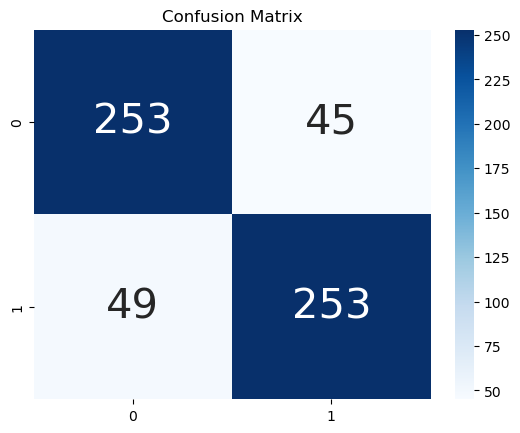

In [ ]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8433333333333334


In [ ]:
#Using cross-validation for parameter tuning
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, normalized_x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#from scipy import stats
#stats.mode(a, keepdims=True)

<Figure size 640x480 with 0 Axes>

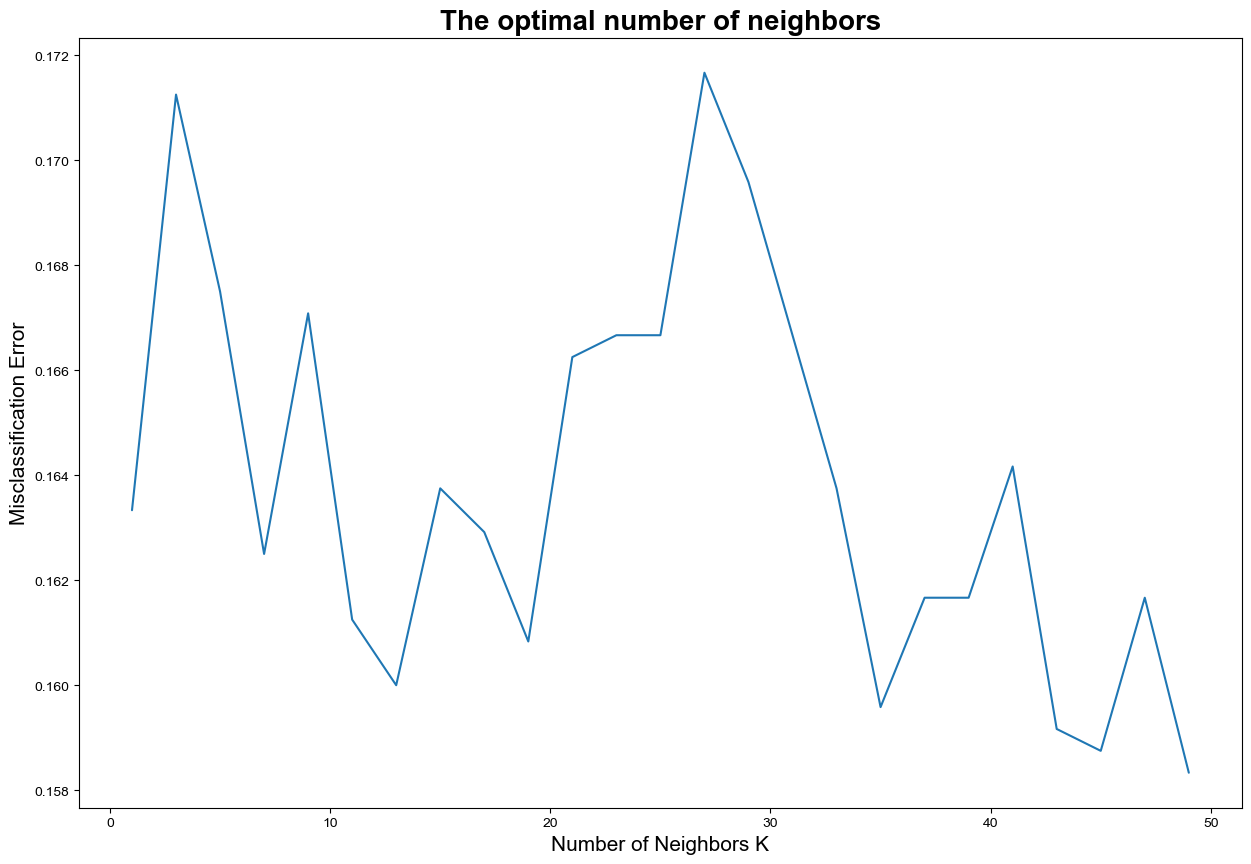

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
 #finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 49.
